In [80]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

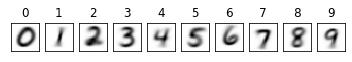

In [81]:
#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)
count = 0

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1



for i in range(0,10) :

    list_label_image = list_image[:,list_label == i]
    m = list_label_image.shape[1]
    avg_image = list_label_image.mean(axis=1)
    
    im_matrix = avg_image.reshape((size_row, size_col))
    plt.subplot(1,10,i+1)
    plt.title(i)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()
    

In [93]:
thetas = np.random.normal(0,1,size_row*size_col)

size_layer_1 = 10
size_layer_2 = 5

thetas_to_layer_1 = torch.DoubleTensor(size_row*size_col,size_layer_1).normal_(0,1)
thetas_to_layer_2 = torch.DoubleTensor(size_layer_1,size_layer_2).normal_(0,1)
thetas_to_output = torch.DoubleTensor(size_layer_2,1).normal_(0,1)


for i in range(0,10) :
    
    list_label_vector = list_image[:,list_label==i]
    m = list_label_vector.shape[1]

    data = torch.DoubleTensor(list_label_vector).T
    y_layer_1 = torch.matmul(data,thetas_to_layer_1)
    z_layer_1 = 1 /  (1+torch.exp(-y_layer_1))

    y_layer_2 = np.matmul(z_layer_1,thetas_to_layer_2)
    z_layer_2 = 1 / (1+torch.exp(-y_layer_2))

    y_output = torch.matmul(z_layer_2,thetas_to_output)
    z_output = 1 / (1+torch.exp(-y_output))

    print(i,z_output.mean())


0 tensor(0.6587, dtype=torch.float64)
1 tensor(0.6577, dtype=torch.float64)
2 tensor(0.6611, dtype=torch.float64)
3 tensor(0.6504, dtype=torch.float64)
4 tensor(0.6680, dtype=torch.float64)
5 tensor(0.6616, dtype=torch.float64)
6 tensor(0.6892, dtype=torch.float64)
7 tensor(0.6545, dtype=torch.float64)
8 tensor(0.6528, dtype=torch.float64)
9 tensor(0.6633, dtype=torch.float64)


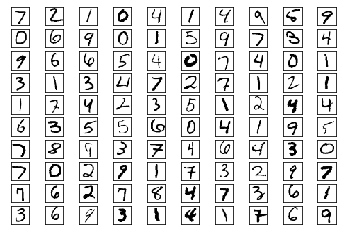

In [58]:
# 
# plot first 100 images out of 10,000 with their labels
# 
f1 = plt.figure(1)

for i in range(100):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 10, i+1)
    #plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()